In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.linalg import lstsq
import rotanimate

In [2]:
data_fname = 'surf_bias_data.txt'
data = np.genfromtxt(data_fname, skip_header=1)

In [3]:
X, Y = np.meshgrid(data[:,0], data[:,1])
Z_Dtau = griddata((data[:,0], data[:,1]), data[:,2], (X, Y))#, method='cubic')
Z_Dstau = griddata((data[:,0], data[:,1]), data[:,3], (X, Y))#, method='cubic')

In [4]:
figsize = (7, 5)
angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360

<IPython.core.display.Javascript object>


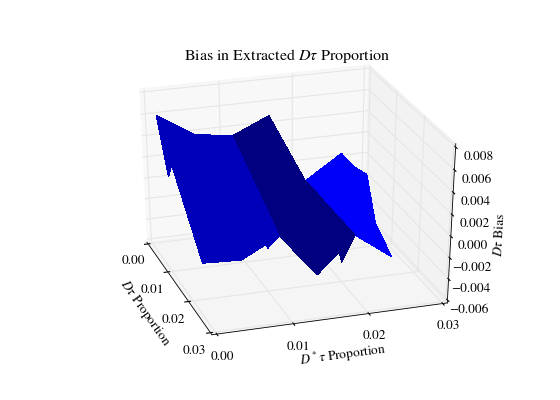

In [5]:
fig = plt.figure(figsize=figsize)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z_Dtau, color='blue', linewidth=0, antialiased=False)
ax.set_title(r'Bias in Extracted $D\tau$ Proportion')
ax.set_xlabel(r'$D\tau$ Proportion')
ax.set_ylabel(r'$D^*\tau$ Proportion')
ax.set_zlabel(r'$D\tau$ Bias')
ax.set_xlim([0,0.03])
ax.set_xticks(np.linspace(0,0.03,4));
ax.set_ylim([0,0.03])
ax.set_yticks(np.linspace(0,0.03,4));

# create an animated gif (50ms between frames)
rotanimate.rotanimate(ax, angles,'dtau.gif',delay=50, width=figsize[0], height=figsize[1]);

plt.show()

<IPython.core.display.Javascript object>


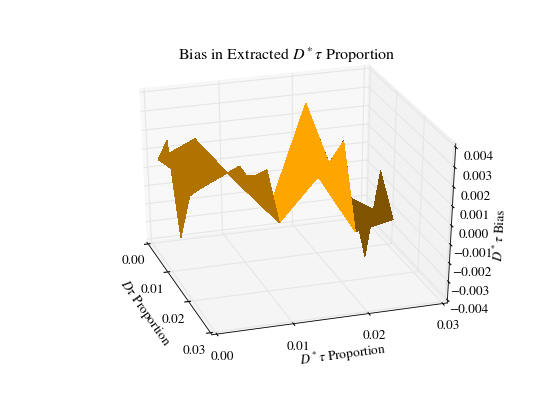

In [6]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z_Dstau, color='orange', linewidth=0, antialiased=False)
ax.set_title(r'Bias in Extracted $D^*\tau$ Proportion')
ax.set_xlabel(r'$D\tau$ Proportion')
ax.set_ylabel(r'$D^*\tau$ Proportion')
ax.set_zlabel(r'$D^*\tau$ Bias')
ax.set_xlim([0,0.03])
ax.set_xticks(np.linspace(0,0.03,4));
ax.set_ylim([0,0.03])
ax.set_yticks(np.linspace(0,0.03,4));

# create an animated gif (50ms between frames)
rotanimate.rotanimate(ax, angles,'dstau.gif',delay=50, width=figsize[0], height=figsize[1]);

plt.show()

In [7]:
# least-squares fit for the best plane
A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C1,_,_,_ = lstsq(A, data[:,2])
C2,_,_,_ = lstsq(A, data[:,3])

Z1 = C1[0]*X + C1[1]*Y + C1[2]
Z2 = C2[0]*X + C2[1]*Y + C2[2]

<IPython.core.display.Javascript object>


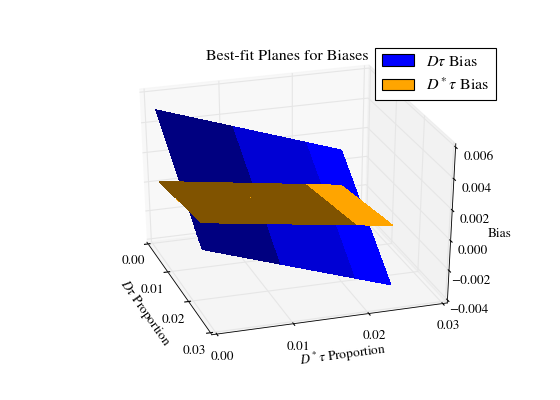

In [8]:
# visualize planes
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z1, color='blue', linewidth=0, antialiased=False, label=r'$D\tau$ Bias')
ax.plot_surface(X, Y, Z2, color='orange', linewidth=0, antialiased=False, label=r'$D^*\tau$ Bias')

ax.set_title(r'Best-fit Planes for Biases')
ax.set_xlabel(r'$D\tau$ Proportion')
ax.set_ylabel(r'$D^*\tau$ Proportion')
ax.set_zlabel(r'Bias')
ax.set_xlim([0,0.03])
ax.set_xticks(np.linspace(0,0.03,4));
ax.set_ylim([0,0.03])
ax.set_yticks(np.linspace(0,0.03,4));

dt_legend = plt.Rectangle((0, 0), 1, 1, fc="b")
dst_legend = plt.Rectangle((0, 0), 1, 1, fc="orange")
ax.legend([dt_legend, dst_legend],[r'$D\tau$ Bias', r'$D^*\tau$ Bias'])

# create an animated gif (50ms between frames)
rotanimate.rotanimate(ax, angles,'planes.gif',delay=50, width=figsize[0], height=figsize[1]);

plt.show()